In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./archive/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [146]:
cat_vars = ["country", "gender", "products_number", "credit_card", "active_member"]
for label in cat_vars:
    print("\n", label)
    print(df[label].value_counts())


 country
France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

 gender
Male      5457
Female    4543
Name: gender, dtype: int64

 products_number
1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

 credit_card
1    7055
0    2945
Name: credit_card, dtype: int64

 active_member
1    5151
0    4849
Name: active_member, dtype: int64


In [5]:
# no missing data
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df.shape

(10000, 12)

In [7]:
# total churn
df["churn"].sum()

2037

In [8]:
# total churn again
df.loc[df["churn"] == 1].shape

(2037, 12)

In [9]:
# churn rate is around 20% => highly unbalanced 
df["churn"].sum() / df.shape[0]

0.2037

In [12]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
# X = df.iloc[:, 1:11]
# y = df["churn"]

# # OneHotEncoder for gender and country
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder()
# X.loc[:, ["country", "gender"]]
# X_new = enc.fit_transform(X[["country"]])
# enc.categories_
# X_new.toarray()
# X["country"] = X_new.toarray()
# X.tail(10)

In [50]:
# MUCH easier
X = df.iloc[:, 1:11]
y = df["churn"]

X = pd.get_dummies(X, drop_first=True)
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [89]:
# 70% train, 15% val, 15% test
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

In [90]:
print(f"{X_train.shape=}")
print(f"{X_val.shape=}")
print(f"{X_test.shape=}")

X_train.shape=(7000, 11)
X_val.shape=(1500, 11)
X_test.shape=(1500, 11)


In [128]:
def print_results(X, y, model):

    y_pred = model.predict(X)
    
    # cm  = confusion_matrix(y, y_pred)
    # mean_accuracy = model.score(X, y)

    # print("Confusion matrix [[TN, FP], [FN, TP]]")
    # print(cm)

    # # mean accuracy (TP + TN / everything)
    # print(f'{mean_accuracy=}')
    print(classification_report(y, y_pred, target_names=["no_churn", "churn"]))

    # roc 
    auc = roc_auc_score(y, model.predict_proba(X)[:, 1])
    # print(f"{auc=}")
    return auc




In [135]:
lr = LogisticRegression()
lr_bal = LogisticRegression(class_weight="balanced")
models = [
    ("lr", lr),
    ("lr_bal", lr_bal),
]
auc_results = []

In [136]:
for name, clf in models:
    model = clf.fit(X_train, y_train)
    print(name, "\nTraining metrics")
    print_results(X_train, y_train, model)
    print("\nValidation metrics")
    auc = print_results(X_val, y_val, model)
    
    auc_results.append(auc)


lr 
Training metrics
              precision    recall  f1-score   support

    no_churn       0.80      0.97      0.88      5547
       churn       0.38      0.06      0.10      1453

    accuracy                           0.78      7000
   macro avg       0.59      0.52      0.49      7000
weighted avg       0.71      0.78      0.72      7000


Validation metrics
              precision    recall  f1-score   support

    no_churn       0.82      0.97      0.89      1216
       churn       0.40      0.07      0.12       284

    accuracy                           0.80      1500
   macro avg       0.61      0.52      0.51      1500
weighted avg       0.74      0.80      0.74      1500

lr_bal 
Training metrics
              precision    recall  f1-score   support

    no_churn       0.89      0.66      0.76      5547
       churn       0.34      0.67      0.45      1453

    accuracy                           0.66      7000
   macro avg       0.61      0.67      0.60      7000
weighted

In [137]:
for i, auc in enumerate(auc_results):
    print(models[i][0], auc)

lr 0.6636281504818384
lr_bal 0.6940847386953299


- Accuracy of 80% is not meaningful because the dataset is highly unbalanced.
- All metrics for churning show that the model sucks

TODO: logistic regression
- [x] get validation set
- [x] define metric to optimize: AUC
- [x] fix imbalance
- [x] save baseline model (logistic regression)

Apply feature scaling
- rescale all numerical features to 0, 1?
- let's check the distribution of each feature for outliers
- if there not many outliers -> normalize
- if outliers -> standardize

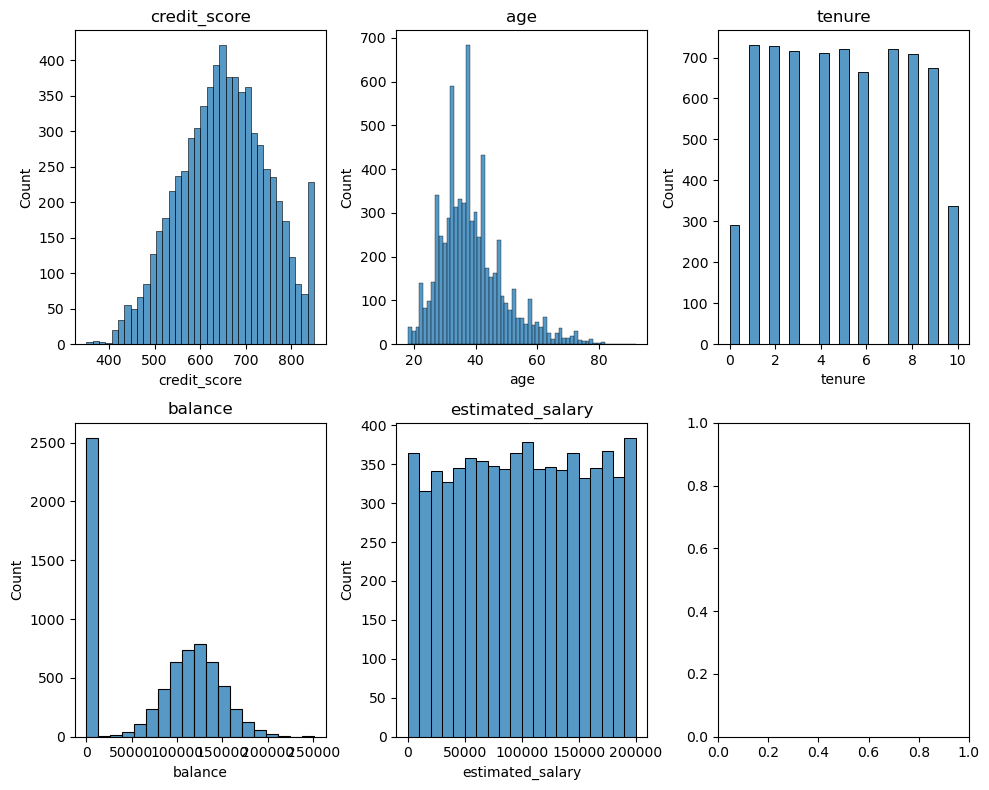

In [151]:
num_vars = ["credit_score", "age", "tenure", "balance", "estimated_salary"]
# X_train[num_vars].hist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot a histogram for each column in the DataFrame
for i, column in enumerate(num_vars):
    sns.histplot(X_train[column], kde=False, ax=axes[i])
    axes[i].set_title(column)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Not so many outliers => Normalization!

**Next: apply min-max scaling and try again**